# Import Necssaries Libraries

In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler, label_binarize
from sklearn.metrics import  confusion_matrix, classification_report, roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from tpot import TPOTClassifier
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

C:\Users\dell\AppData\Local\Programs\Python\Python39\lib\site-packages\requests\__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.8) or chardet (5.0.0)/charset_normalizer (2.0.11) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "
C:\Users\dell\AppData\Local\Programs\Python\Python39\lib\site-packages\tpot\builtins\__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")


# EDA

In [4]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [6]:
print(f"in this data we have {df.shape[0]} row and {df.shape[1]} columns")

in this data we have 200 row and 5 columns


In [7]:
df.nunique()

CustomerID                200
Gender                      2
Age                        51
Annual Income (k$)         64
Spending Score (1-100)     84
dtype: int64

In [8]:
df.columns[df.isna().any()]

Index([], dtype='object')

([<matplotlib.patches.Wedge at 0x232a0b3d460>,
 [Text(0.21174089379580954, 1.1099845917374493, 'male'),
  Text(-0.2117408937958099, -1.1099845917374493, 'female')],
 [Text(0.11805023282421238, 0.618840967074861, '44.00%'),
  Text(-0.11805023282421259, -0.6188409670748609, '56.00%')])

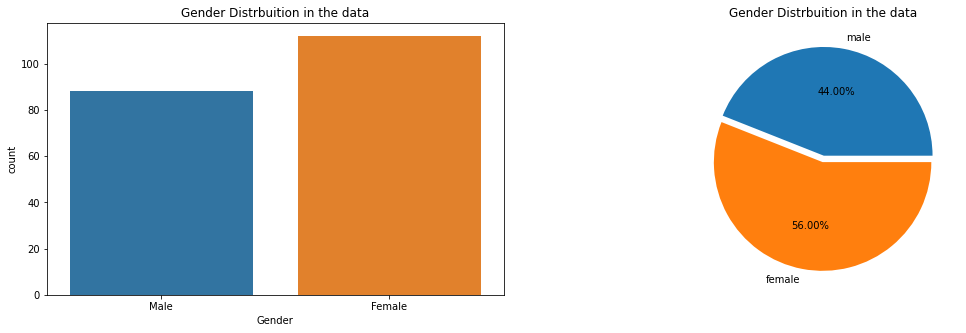

In [9]:
plt.figure(figsize=(18,11))
plt.subplot(2,2,1)
plt.title("Gender Distrbuition in the data")
sns.countplot(x="Gender", data=df)
plt.subplot(2,2,2)
plt.title("Gender Distrbuition in the data")
M= df.Gender[df["Gender"]=="Male"].count()
F= df.Gender[df["Gender"] =="Female"].count()
labels= ["male", "female"]
plt.pie([M,F], labels=labels, autopct='%.2f%%', explode=[0.03,0.03])

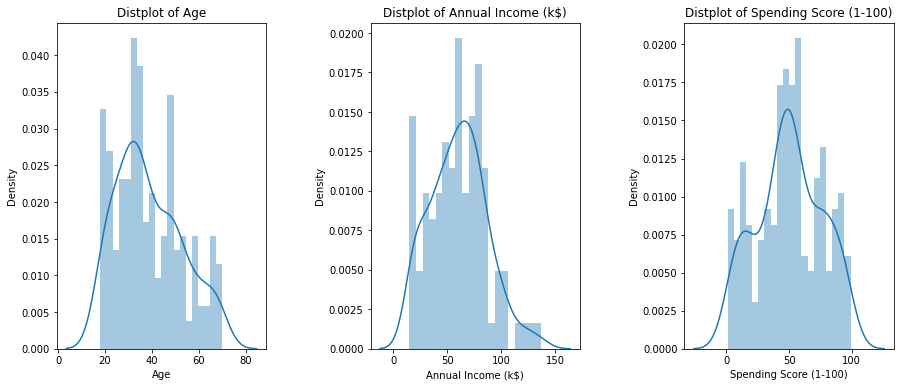

In [10]:
plt.figure(1 , figsize = (15 , 6))
n = 0 
data = ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']
for x in data:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(df[x] , bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show()

<h3>we notes Distrbution of Age, Annaul Income and Spending Score
those features as they have a little skeweenes and kurtosis are tends to be normally distrbuted </h3>

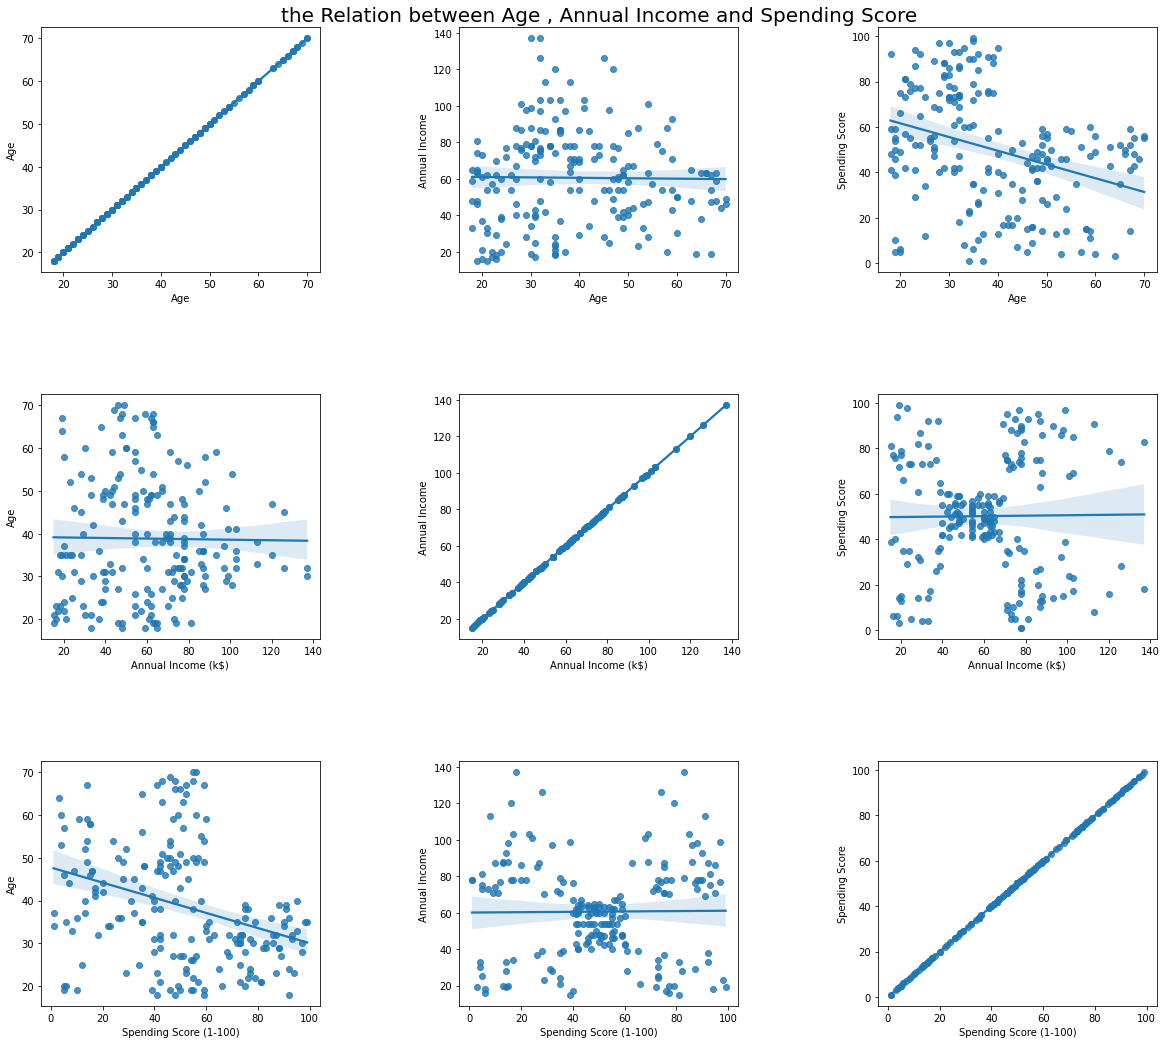

In [12]:
plt.figure(figsize=(20,18))
n =0 
data=['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']
for x in data:
    for y in data:
        n += 1
        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
        sns.regplot(x = x , y = y , data = df)
        plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y )
        plt.title('the Relation between Age , Annual Income and Spending Score' if n==2 else '',{'fontsize':20})
plt.show()

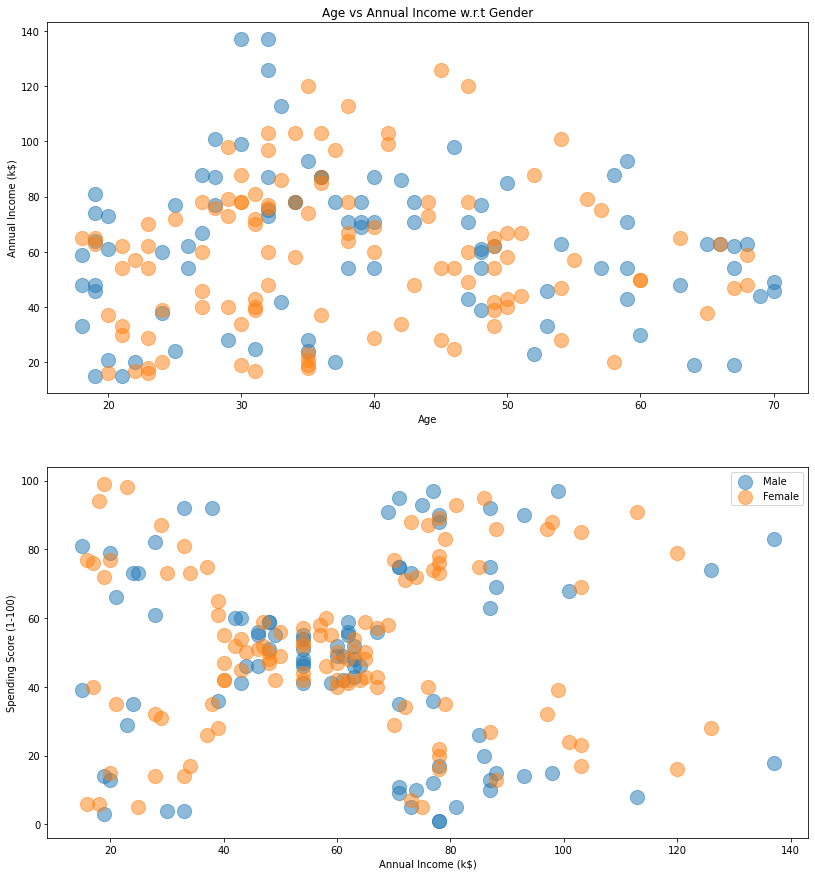

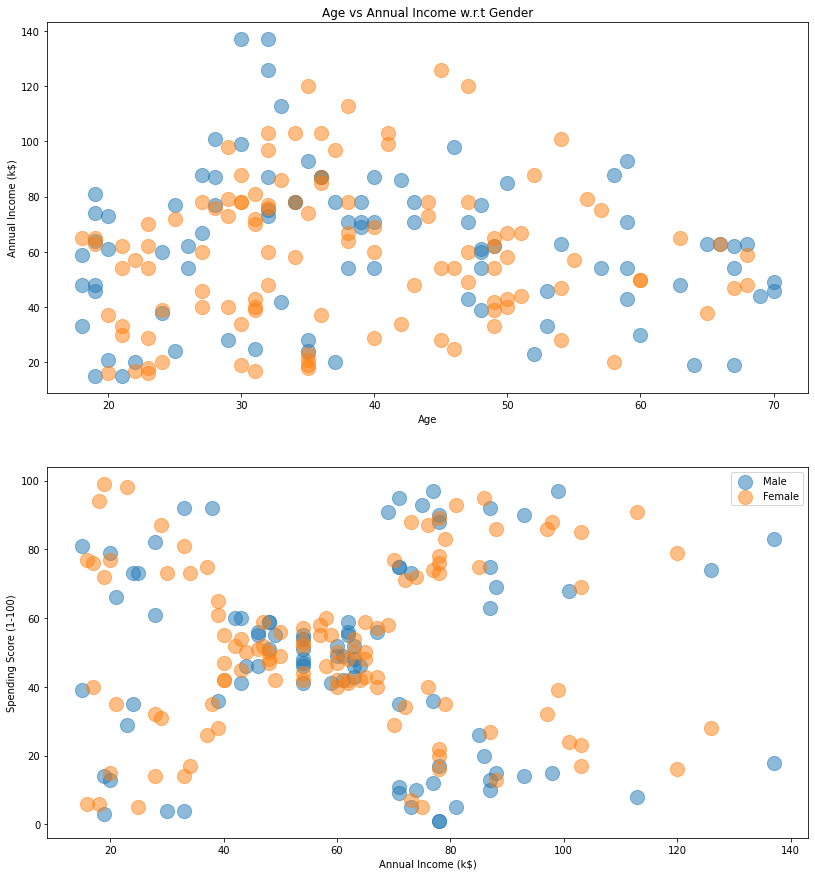

In [17]:
plt.figure(figsize=(30,15))
plt.subplot(2,2,1)
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Age' , y = 'Annual Income (k$)' , data = df[df['Gender'] == gender] ,
                s = 200 , alpha = 0.5 , label = gender)
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)') 
plt.title('Age vs Annual Income w.r.t Gender')

plt.subplot(2,2,3)
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Annual Income (k$)',y = 'Spending Score (1-100)' ,
                data = df[df['Gender'] == gender] ,s = 200 , alpha = 0.5 , label = gender)
plt.xlabel('Annual Income (k$)'), plt.ylabel('Spending Score (1-100)') 

plt.legend()
plt.show()
plt.show()

#### from the lastest plot we note that is no clear relation here

Text(0.5, 1.0, 'Age vs Spending Score w.r.t Gender')

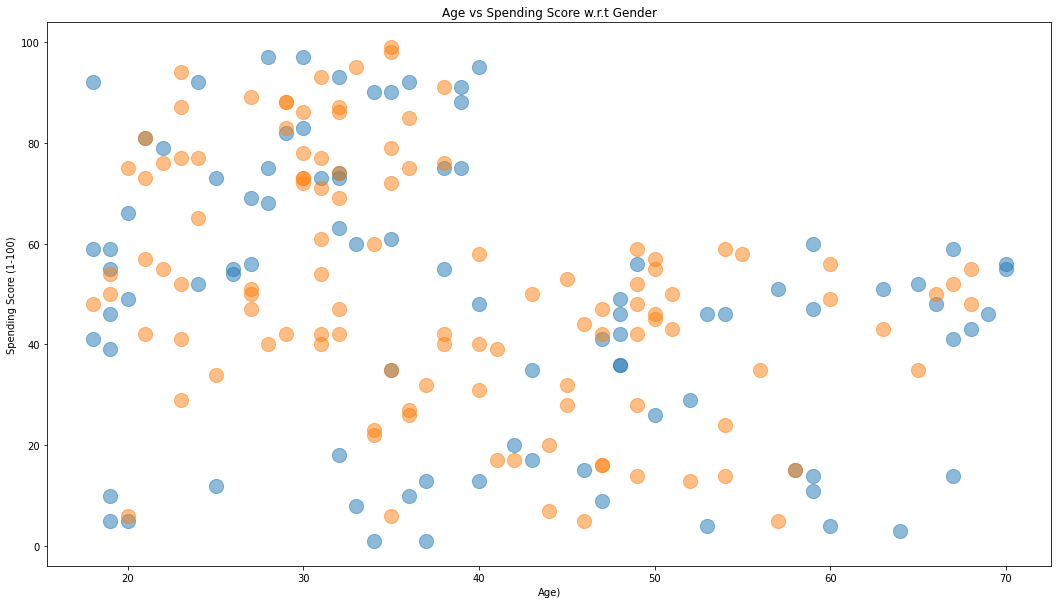

In [20]:
plt.figure(figsize=(18,10))
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Age',y = 'Spending Score (1-100)' ,
                data = df[df['Gender'] == gender] ,s = 200 , alpha = 0.5 , label = gender)
plt.xlabel('Age)'), plt.ylabel('Spending Score (1-100)') 
plt.title('Age vs Spending Score w.r.t Gender')

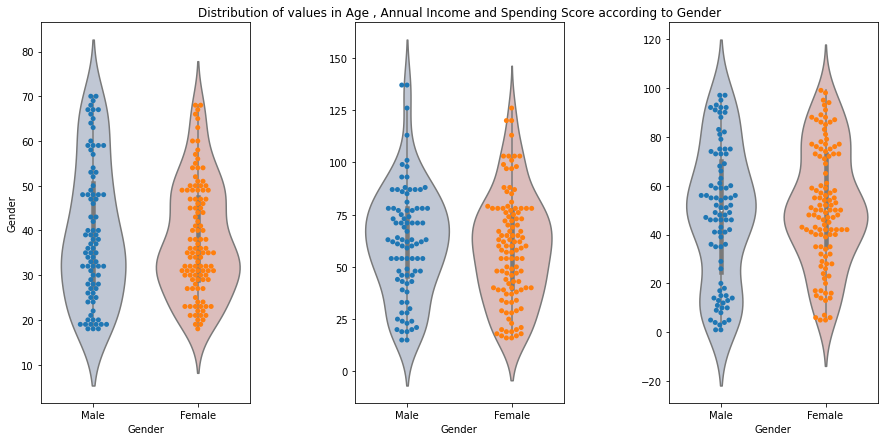

In [21]:
plt.figure(1 , figsize = (15 , 7))
n = 0 
for cols in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1 
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.violinplot(x = 'Gender' , y = cols , data = df , palette = 'vlag')
    sns.swarmplot(x = 'Gender' , y = cols , data = df)
    plt.ylabel('Gender' if n == 1 else '')
    plt.title('Distribution of values in Age , Annual Income and Spending Score according to Gender' if n == 2 else '')
plt.show()

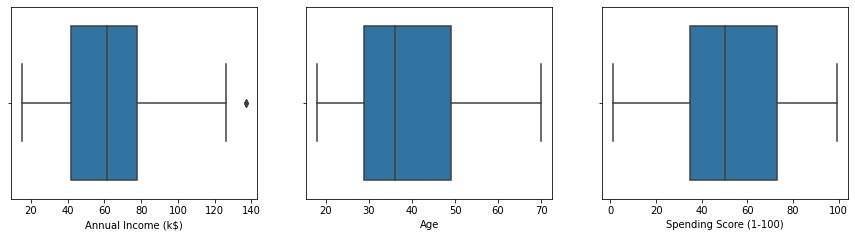

In [26]:
plt.figure(figsize=(15,12))

plt.subplot(3,3,1)
sns.boxplot(x='Annual Income (k$)', data=df)

plt.subplot(3,3,2)
sns.boxplot(x='Age', data=df)

plt.subplot(3,3,3)
sns.boxplot(x='Spending Score (1-100)', data=df);


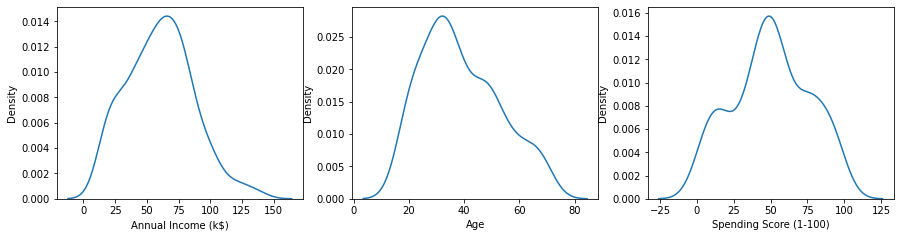

In [27]:
plt.figure(figsize=(15,12))

plt.subplot(3,3,1)
sns.kdeplot(x='Annual Income (k$)', data=df)

plt.subplot(3,3,2)
sns.kdeplot(x='Age', data=df)

plt.subplot(3,3,3)
sns.kdeplot(x='Spending Score (1-100)', data=df);

In [28]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [29]:
data = df[["Age", "Annual Income (k$)", "Spending Score (1-100)" ]]

In [31]:
data.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


# Clustring

In [37]:
X = df.iloc[:,[3,4]].values

In [39]:
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [40]:
wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i,random_state=42)
  kmeans.fit(X)

  wcss.append(kmeans.inertia_)

## Elbow Plot

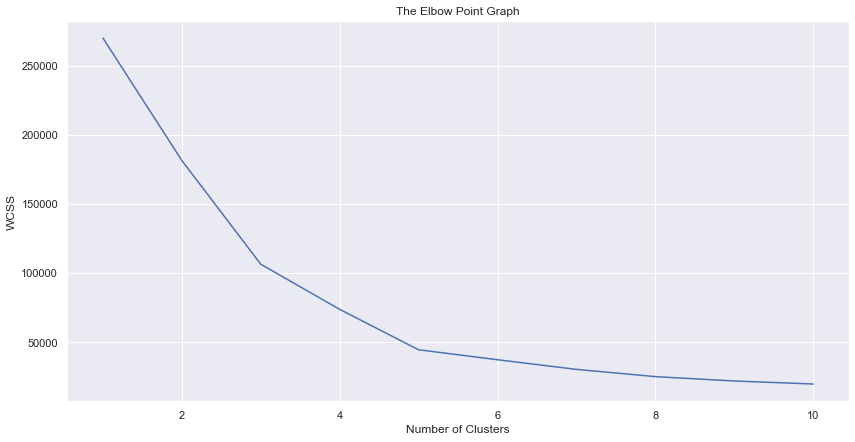

In [45]:
plt.figure(figsize=(14,7))
plt.plot(range(1,11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

### we note that Optimum Number of Clusters is five 

In [46]:
kmeans = KMeans(n_clusters=5, random_state=0)

# return a label for each data point based on their cluster
Y = kmeans.fit_predict(X)

print(Y)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


## Plotting all the Clusters and their Centroids

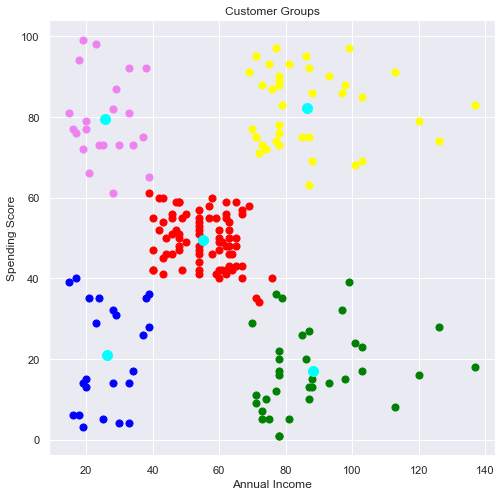

In [47]:
plt.figure(figsize=(8,8))
plt.scatter(X[Y==0,0], X[Y==0,1], s=50, c='green', label='Cluster 1')
plt.scatter(X[Y==1,0], X[Y==1,1], s=50, c='red', label='Cluster 2')
plt.scatter(X[Y==2,0], X[Y==2,1], s=50, c='yellow', label='Cluster 3')
plt.scatter(X[Y==3,0], X[Y==3,1], s=50, c='violet', label='Cluster 4')
plt.scatter(X[Y==4,0], X[Y==4,1], s=50, c='blue', label='Cluster 5')

# plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='cyan', label='Centroids')

plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

## Analysis the Clusters

In [48]:
df['target'] = Y
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),target
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4


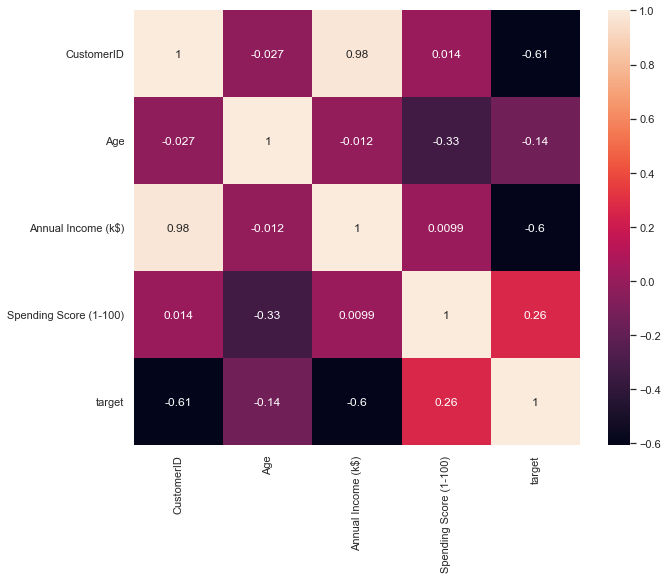

In [49]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True);

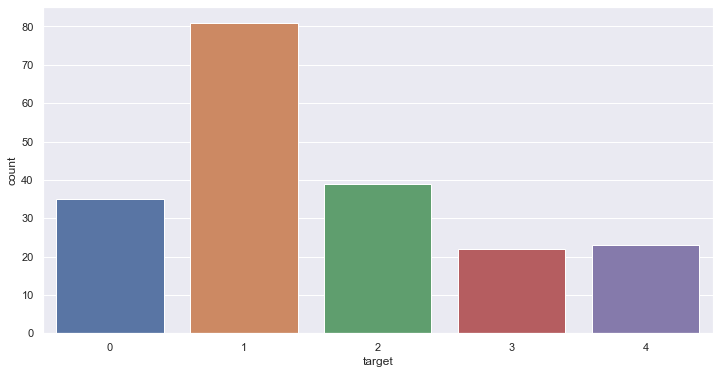

In [50]:
plt.figure(figsize=(12,6))
sns.countplot(x='target', data=df);

<AxesSubplot:xlabel='Gender', ylabel='count'>

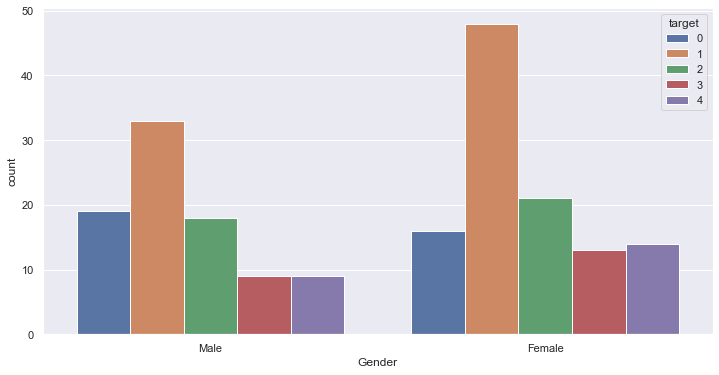

In [51]:
plt.figure(figsize=(12,6))
sns.countplot(x='Gender', hue='target', data=df)

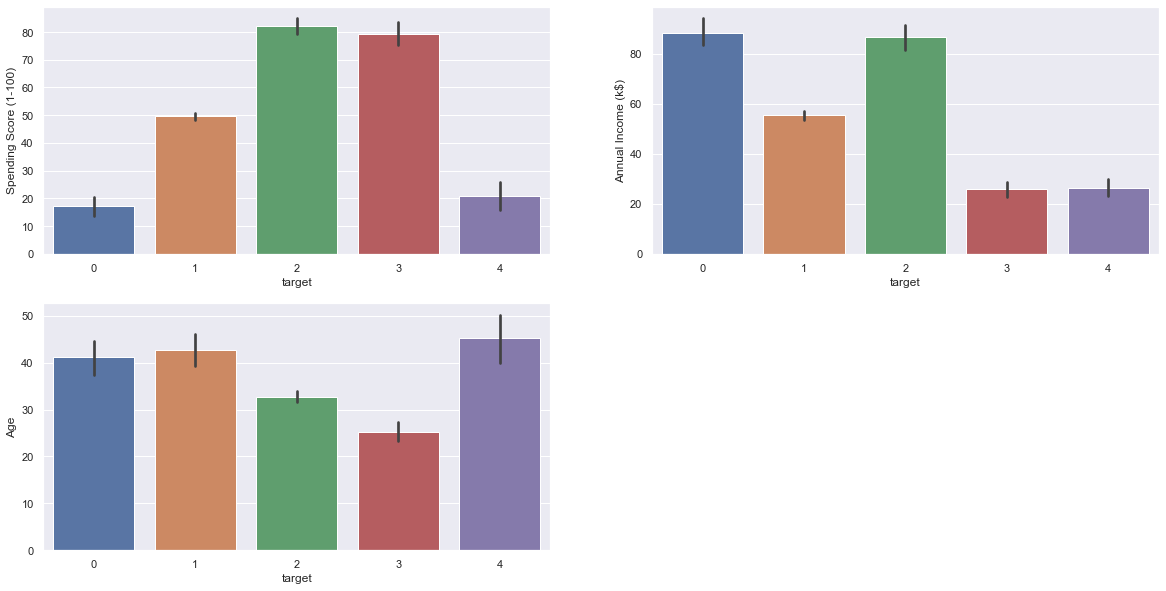

In [52]:
plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
sns.barplot(x='target',y='Spending Score (1-100)', data=df)

plt.subplot(2,2,2)
sns.barplot(x='target',y='Annual Income (k$)', data=df);

plt.subplot(2,2,3)
sns.barplot(x='target',y='Age', data=df);

**Cluster 0 contains clients with a high salary and low Spending Score and Average age 40**<br>
**Cluster 1 contains clients with an average salary and average Spending Score and Average age 43**<br>
**Cluster 2 contains clients with a high salary and high Spending Score and Average age 32**<br>
**Cluster 3 contains clients with a low salary and high Spending Score and Average age 25**<br>
**Cluster 4 contains clients with a low salary and low Spending Score and Average age 45**<br>

# Data Preprocessing

In [53]:
df2 = df.copy()

In [54]:
encoding = LabelEncoder()
df2['Gender'] = encoding.fit_transform(df2['Gender'])

In [55]:
df2.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),target
0,1,1,19,15,39,4
1,2,1,21,15,81,3
2,3,0,20,16,6,4
3,4,0,23,16,77,3
4,5,0,31,17,40,4


In [56]:
df2.drop("CustomerID", axis=1, inplace=True)

# Assign Feature and target Variables

In [57]:
X = df2.drop("target", axis=1)
y = df2.target

In [58]:
X.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


# Feature Scaling

In [59]:
scaler = StandardScaler()
X_scale = scaler.fit_transform(X)
X_scale

array([[ 1.12815215, -1.42456879, -1.73899919, -0.43480148],
       [ 1.12815215, -1.28103541, -1.73899919,  1.19570407],
       [-0.88640526, -1.3528021 , -1.70082976, -1.71591298],
       [-0.88640526, -1.13750203, -1.70082976,  1.04041783],
       [-0.88640526, -0.56336851, -1.66266033, -0.39597992],
       [-0.88640526, -1.20926872, -1.66266033,  1.00159627],
       [-0.88640526, -0.27630176, -1.62449091, -1.71591298],
       [-0.88640526, -1.13750203, -1.62449091,  1.70038436],
       [ 1.12815215,  1.80493225, -1.58632148, -1.83237767],
       [-0.88640526, -0.6351352 , -1.58632148,  0.84631002],
       [ 1.12815215,  2.02023231, -1.58632148, -1.4053405 ],
       [-0.88640526, -0.27630176, -1.58632148,  1.89449216],
       [-0.88640526,  1.37433211, -1.54815205, -1.36651894],
       [-0.88640526, -1.06573534, -1.54815205,  1.04041783],
       [ 1.12815215, -0.13276838, -1.54815205, -1.44416206],
       [ 1.12815215, -1.20926872, -1.54815205,  1.11806095],
       [-0.88640526, -0.

# Split the data into Training and Testing data

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X_scale,y, test_size=0.25, random_state=20)

In [61]:
print(f"Number of Training dataset: {len(X_train)}\nNumber of Testing dataset: {len(X_test)}")

Number of Training dataset: 150
Number of Testing dataset: 50


# Modeling

In [62]:
def kfolds(model, model_name):
    model = cross_val_score(model, X,y, cv=5)
    model_score = np.average(model)
    print(f"{model_name} score on cross validation: {model_score * 100}%")

def train(model, model_name):
    model.fit(X_train, y_train)
    model_train_score = model.score(X_train, y_train)
    model_test_score = model.score(X_test, y_test)
    print(f"{model_name} model score on Training data: {model_train_score * 100}%\n{model_name} model score on Testing data: {model_test_score * 100}%")

def conf_matrix(model):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10,8))
    sns.heatmap(cm, annot=True);
    
def class_report(model):
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))

def roc(model):
    y_binarize = label_binarize(y, classes=[0,1,2,3,4])
    y_binarize.shape
    n_classes = y_binarize.shape[1]
    X_train, X_test, y_train, y_test = train_test_split(X,y_binarize, test_size=0.25, random_state=150)
    classifier = OneVsRestClassifier(
    model)
    y_score = classifier.fit(X_train, y_train).decision_function(X_test)
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    plt.figure(figsize=(10,7))
    lw = 2
    plt.plot(
        fpr[2],
        tpr[2],
        color="darkorange",
        lw=lw,
        label="ROC curve (area = %0.2f)" % roc_auc[2],
    )
    plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver operating characteristic")
    plt.legend(loc="lower right")
    plt.show()

## Logistic Regression

In [64]:
lr = LogisticRegression()
kfolds(lr, "Logistic Regression")
train(lr, "Logistic Regression")

Logistic Regression score on cross validation: 83.0%
Logistic Regression model score on Training data: 96.0%
Logistic Regression model score on Testing data: 100.0%


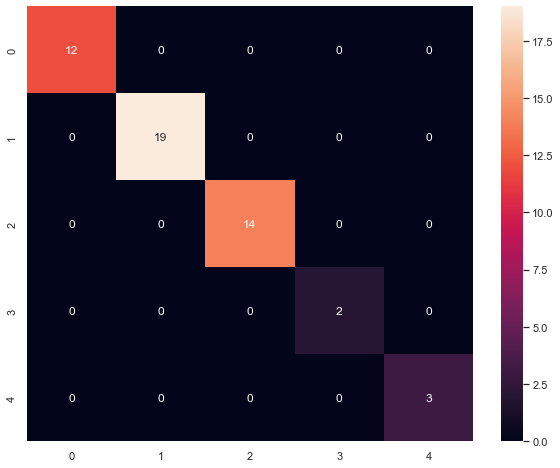

In [65]:
conf_matrix(lr)

In [66]:
class_report(lr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        19
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         3

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



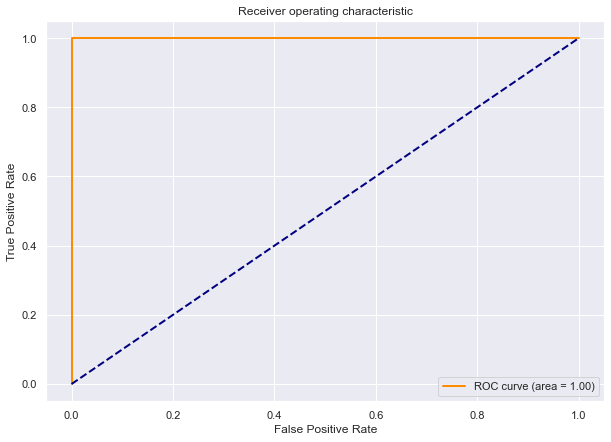

In [67]:
roc(lr)

## Random Forest

In [68]:
rf = RandomForestClassifier()
kfolds(rf, "Random Forest")
train(rf, "Random Forest")

Random Forest score on cross validation: 90.99999999999999%
Random Forest model score on Training data: 100.0%
Random Forest model score on Testing data: 98.0%


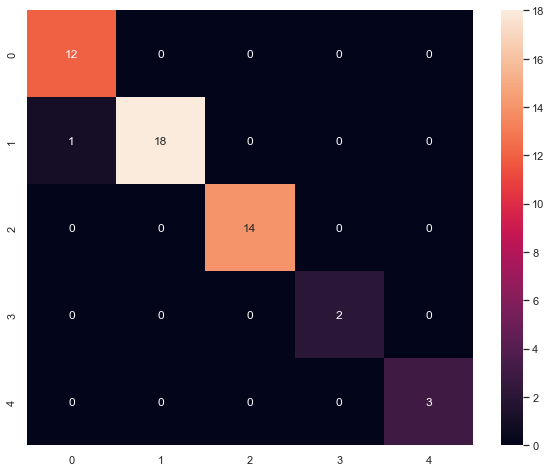

In [69]:
conf_matrix(rf)

In [70]:
class_report(rf)

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        12
           1       1.00      0.95      0.97        19
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         3

    accuracy                           0.98        50
   macro avg       0.98      0.99      0.99        50
weighted avg       0.98      0.98      0.98        50



In [71]:
svm_model = SVC(kernel='linear')
kfolds(svm_model, "SVM")
train(svm_model, "SVM")

SVM score on cross validation: 94.0%
SVM model score on Training data: 99.33333333333333%
SVM model score on Testing data: 100.0%


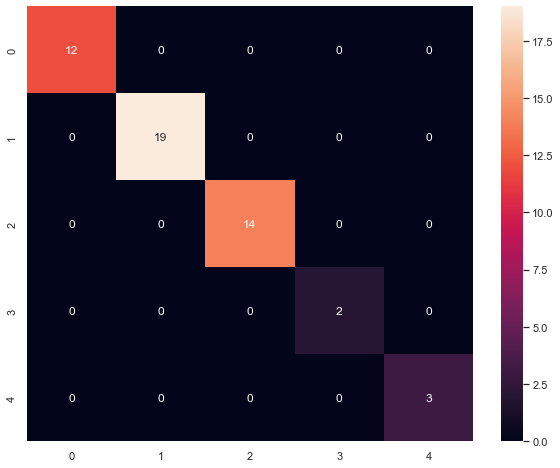

In [72]:
conf_matrix(svm_model)